# Murderer or Victim?

### Problem statements (objectives):
    - What are the chances that you are either a murderer or a victim depending on the set variables and attributes
    - What are the characteristics of murderers or victims
    - What kind of relationship is between the data
    - Identify the serial killer activity per location and year
    - Identify interasting relationships (correlation) between different variables later to be used for building a 
        decision tree and clustering
        
        
    - AUDIENCElike you are working for someone 
    - how safe is your state
    - how do you sell it to police (to sell this product)
    - location wise perp/vic
    - construction company 
    - age groups --> can ew improve education (can we improve) 
    - propose to state gov. 
    - whats the solution if proposal
    - yes/npo 
    - 3 departments (wants bigger university, construc community, police) by show of hands what will you support 
    - each have 3 minutes --> competition 
    - write it as a storyline (qestion biggest - safedt location..., more people in university)
    - how to get to that conclusion 
    - another notebook for presentation (asking for money) --> monopoly --> collect 
    - who cares? apply it to specific question --> put it to them hands to care (hook in)
    - questions --> make you point 
    - pass the hat to collect the momey --> moderator (anonymous voting) --> online 
    - whats the million dollar question ? 3 questions 
    - real comptetitions --> attacking each other fighting over million dollars (or live debate --> atack back your project is stupid can prove it)
    - just insight 
    
### Glossary

Our main homocide dataset consists of 24 columns of 638,454 rows. Features are explained in detail in the getting to know the data section. The following features (variables) are integer based and will be used for calculations:
    1. The record ID simply signifies the number of rows)
    2. Year and month data was collected from 1980-2014 (depending on location)
    3. Incident are the case(s) for which these other features were collected (e.g. 1 incident for year 2014 in CT etc.)
    4. Victim Age
    5. Perpetrator Age
    6. Victim Count and Perpertrator Count starting with zero and maximum value of 10 (the original dataset) tells us about        the number of victims and perpetrators involved in a particular incident.  
    
The folowing columns are an object data type:
    1. Agency code is six-digit alphanumeric code used to classify accounts by the federal or non-federal agency. 
        The alpha part of the code is the parent or major agency. The numeric part of the code identifies the sub-agency.
    2. Agency name
    3. Agency type 
    4. City, state
    5. Victim and perpetrator sex, ethnicity, race, relationship
    6. Crime type
    # Murder or Mansloughter
    # Mansloughter by negligence
    7. Crime solved
    8. Weapon
    
### Data Source and Content

Source: https://www.kaggle.com/murderaccountability/homicide-reports

The Murder Accountability Project is the most complete database of homicides in the United States currently available. This dataset includes murders from the FBI's Supplementary Homicide Report from 1976 to the present and Freedom of Information Act data on more than 22,000 homicides that were not reported to the Justice Department. This dataset includes the age, race, sex, ethnicity of victims and perpetrators, in addition to the relationship between the victim and perpetrator and weapon used.

Acknowledgements

The data was compiled and made available by the Murder Accountability Project, founded by Thomas Hargrove.

# Findings

    - Starting with 638453 of observations after removing all missing or uknown data we end up with 151243.
        Which is concerning as 497,210 incidents do not have all the information. 
    - There were 190,282 unsolved crimes in the original dataset. Even if we say that these are the crimes 
    we do not have complete data on it still leaves 306,928 without complete information. 

    - In 2014 not cleaned data: Perpetrator Count 17816, Victim Count 16396

    - FBI CITED: In 2014, the estimated number of murders in the nation was 14,249. 
        There were more perpetrators than victims. 

    - In 2013 from our data: 
        - Perpetrator Count    17930
        - Victim Count         16721

    - In the 2013 FBI reported 14,196 murders. 
    
### Interesting question:
    - we would be interested to see the growth rate per year and/or state. 
    - This numbers match almost the same as to online resources meaning that reporting is the problem. Why?
    - Based on the relationship how far/less likely are you to be a victim. 
    - detect serial murderer activity
    - Fill in the gaps with mashine learning classification on the clean data 
    
Reason why reporting might not as good:

The victims survey is an important tool for researchers because a significant percentage of crimes are never reported to police and so are not counted in other measures like the FBI’s Uniform Crime Reporting program. By asking nearly 225,000 people if they’ve been victims of crime and whether they reported it to the police, the survey tries to fill in the gaps of other measures that can undercount crimes in communities where vulnerable populations do not go to the police for help as often.

The U.S. has two major data collection programs, the Uniform Crime Reports from the FBI and the National Crime Victimization Survey from the Bureau of Justice Statistics. However, the U.S. has no comprehensive infrastructure to monitor crime trends and report the information to related parties such as law enforcement.[2]

while domestic violence, domestic child abuse and sexual offences are frequently significantly under-reported because of the intimate relationships involved, embarrassment and other factors that make it difficult for the victim to make a report.

http://theconversation.com/why-the-us-needs-better-crime-reporting-statistics-104731

## 1. Data exploration and finding errors

The intention here is to get to know the data and identify errors column by column. 

In [117]:
# importing libraries

import pandas as pd # importing, data manipulation, subsetting
import numpy as np # linear algebra

In [118]:
# reading in the csv file 
data = pd.read_csv("US HOMOCIDE REPORT.csv")

# diplay first 3 and last 3 rows of the dataset
head = data.head(3)
tail = data.tail(3)

# concatonate it together 
pd.concat([head,tail])

,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,...,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
0,1,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,...,Unknown,Male,15,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0,0,FBI
1,2,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
2,3,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,0,FBI
638450,638452,WY01701,Sheridan,Municipal Police,Sheridan,Wyoming,2014,September,1,Murder or Manslaughter,...,Unknown,Female,22,Asian/Pacific Islander,Unknown,Daughter,Suffocation,0,0,FBI
638451,638453,WY01800,Sublette County,Sheriff,Sublette,Wyoming,2014,December,1,Murder or Manslaughter,...,Not Hispanic,Male,31,White,Not Hispanic,Stranger,Knife,0,1,FBI
638452,638454,WY01902,Rock Springs,Municipal Police,Sweetwater,Wyoming,2014,September,1,Murder or Manslaughter,...,Not Hispanic,Female,24,White,Not Hispanic,Daughter,Blunt Object,0,1,FBI


In [119]:
# data inspection
# from our output and warning we see that "Perpetrator Age" column is considered and object while it should be an integer
# no-null values found yet 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 638453 entries, 0 to 638452
Data columns (total 24 columns):
Record ID                638453 non-null int64
Agency Code              638453 non-null object
Agency Name              638453 non-null object
Agency Type              638453 non-null object
City                     638453 non-null object
State                    638453 non-null object
Year                     638453 non-null int64
Month                    638453 non-null object
Incident                 638453 non-null int64
Crime Type               638453 non-null object
Crime Solved             638453 non-null object
Victim Sex               638453 non-null object
Victim Age               638453 non-null int64
Victim Race              638453 non-null object
Victim Ethnicity         638453 non-null object
Perpetrator Sex          638453 non-null object
Perpetrator Age          638453 non-null int64
Perpetrator Race         638453 non-null object
Perpetrator Ethnicity    63845

In [120]:
# no null values found
# that does not mean there are no mistakes 
data.isnull().sum()

Record ID                0
Agency Code              0
Agency Name              0
Agency Type              0
City                     0
State                    0
Year                     0
Month                    0
Incident                 0
Crime Type               0
Crime Solved             0
Victim Sex               0
Victim Age               0
Victim Race              0
Victim Ethnicity         0
Perpetrator Sex          0
Perpetrator Age          0
Perpetrator Race         0
Perpetrator Ethnicity    0
Relationship             0
Weapon                   0
Victim Count             0
Perpetrator Count        0
Record Source            0
dtype: int64

In [121]:
# unique values for agency code
# Starts with a state abbreviation and the code to state/federal agency
data["Agency Code"].unique()

array(['AK00101', 'AK00103', 'AK00106', ..., 'WA01750', 'WA02705',
       'WVWSP65'], dtype=object)

In [122]:
# value counts for agency code
# New York, California, and Ilionios agencys are observed the most 
data["Agency Code"].value_counts()

NY03030    38416
CA01942    23663
ILCPD00    21331
MI82349    17206
TXHPD00    12881
           ...  
CO02402        1
NY05424        1
OH01844        1
AL03402        1
KS09800        1
Name: Agency Code, Length: 12003, dtype: int64

In [123]:
# 2/3 of the crimes are solved
data["Crime Solved"].value_counts()

Yes    448172
No     190281
Name: Crime Solved, dtype: int64

In [124]:
# unique values for agency names
data["Agency Name"].unique()

array(['Anchorage', 'Juneau', 'Nome', ..., 'Sp: Hundred',
       'Sheridan County', 'Sublette County'], dtype=object)

In [125]:
# New York, LA, and Chicago agency are observed the most
data["Agency Name"].value_counts()

New York                        38416
Los Angeles                     29007
Chicago                         21331
Detroit                         17206
Houston                         13046
                                ...  
Sharkey                             1
Sykesville                          1
Ontwa Township - Edwardsburg        1
Mapleton                            1
Gove County                         1
Name: Agency Name, Length: 9216, dtype: int64

In [126]:
# unique values for agency type
data["Agency Type"].unique()

array(['Municipal Police', 'County Police', 'State Police', 'Sheriff',
       'Special Police', 'Regional Police', 'Tribal Police'], dtype=object)

In [127]:
# unique values for agency type
# almost all murder incidences are handled by the municipal police 
data["Agency Type"].value_counts()

Municipal Police    493025
Sheriff             105322
County Police        22693
State Police         14235
Special Police        2889
Regional Police        235
Tribal Police           54
Name: Agency Type, dtype: int64

In [128]:
# unique values for the city
data["City"].unique()

array(['Anchorage', 'Juneau', 'Nome', ..., 'Rooks', 'McCone', 'Antelope'],
      dtype=object)

In [129]:
# unique values for city
# We see small cities like Cook, Wayne and Harrison with large amounts of incident reports
# i.e. Wayne has a popolation of about 2,000
data["City"].value_counts()

Los Angeles    44511
New York       38431
Cook           22383
Wayne          19904
Harris         16331
               ...  
Bronx              1
Treasure           1
McCone             1
Hanson             1
Sully              1
Name: City, Length: 1782, dtype: int64

In [130]:
# unique values for the state
state_count = data["State"].value_counts()
state_count

California              99783
Texas                   62095
New York                49268
Florida                 37164
Michigan                28448
Illinois                25871
Pennsylvania            24236
Georgia                 21088
North Carolina          20390
Louisiana               19629
Ohio                    19158
Maryland                17312
Virginia                15520
Tennessee               14930
Missouri                14832
New Jersey              14132
Arizona                 12871
South Carolina          11698
Indiana                 11463
Alabama                 11376
Oklahoma                 8808
Washington               7815
District of Columbia     7115
Arkansas                 6947
Colorado                 6593
Kentucky                 6554
Mississippi              6546
Wisconsin                6191
Massachusetts            6036
Nevada                   5553
Connecticut              4896
New Mexico               4272
Oregon                   4217
Minnesota 

In [131]:
# District of Columbia is included
# We will treat it as a state
state_count.count()

51

In [132]:
# unique values for state
# we see that there is a positive skew 
state_count.describe()

count       51.000000
mean     12518.686275
std      17686.524901
min        308.000000
25%       1683.000000
50%       6554.000000
75%      15225.000000
max      99783.000000
Name: State, dtype: float64

In [133]:
# unique values for the years
# 35 years worth of data
data["Year"].value_counts().count()

35

In [134]:
# unique values for month
# 12 months
data["Month"].value_counts().count()

12

In [135]:
# unique values for the incident
# The incident is a count. If only 1 incident happened e.g. in 1980 in Alabama, white male in Birmimham counts as 1
# if 2 then the new observation is counted as 2. The previous 1 is still counted as 1. 
# Meaning that we will need to get rid of these values so we do not overcount the incidences 
data["Incident"].value_counts()

1      265528
2       71779
3       39236
4       27113
5       20658
        ...  
784        16
783        16
782        16
781        16
0          16
Name: Incident, Length: 1000, dtype: int64

In [136]:
# unique values for crime type
    # Involuntary manslaughter usually refers to an unintentional killing that results from criminal
    # negligence or recklessness, or from committing an offense such as a DUI.
    # It differs from voluntary manslaughter in that the victim's death is unintended.
data["Crime Type"].value_counts()

Murder or Manslaughter        629337
Manslaughter by Negligence      9116
Name: Crime Type, dtype: int64

In [137]:
# unique values for victim sex
# the majority of victims are reported male
data["Victim Sex"].value_counts()

Male       494124
Female     143345
Unknown       984
Name: Victim Sex, dtype: int64

In [138]:
# unique values for victim age
# victims are mostly in their 20's
data["Victim Age"].value_counts()

22    23049
20    23031
25    22939
21    22796
23    22438
      ...  
94      116
95       82
97       39
96       37
98       33
Name: Victim Age, Length: 101, dtype: int64

In [139]:
# unique values for agency type
# does the age 0 represent killing of newborns? if so how many of such reports?
data["Victim Age"].describe()

count    638453.000000
mean         35.033495
std          41.628336
min           0.000000
25%          22.000000
50%          30.000000
75%          42.000000
max         998.000000
Name: Victim Age, dtype: float64

In [140]:
# over 35 years 8444 victims were age 0 
data[data["Victim Age"]==0].count()

Record ID                8444
Agency Code              8444
Agency Name              8444
Agency Type              8444
City                     8444
State                    8444
Year                     8444
Month                    8444
Incident                 8444
Crime Type               8444
Crime Solved             8444
Victim Sex               8444
Victim Age               8444
Victim Race              8444
Victim Ethnicity         8444
Perpetrator Sex          8444
Perpetrator Age          8444
Perpetrator Race         8444
Perpetrator Ethnicity    8444
Relationship             8444
Weapon                   8444
Victim Count             8444
Perpetrator Count        8444
Record Source            8444
dtype: int64

In [141]:
# we notice there is mistake/typo
# no way someone is 988 years old and if so, it might have been time 
data["Victim Age"].max()

998

In [142]:
# unique values for victim race
# mostly white
# considering the african-americans account for 13% of US population the results are very close
data["Victim Race"].value_counts()

White                            317422
Black                            299898
Asian/Pacific Islander             9890
Unknown                            6676
Native American/Alaska Native      4567
Name: Victim Race, dtype: int64

In [143]:
# unique values for victim ethnicity
data["Victim Ethnicity"].value_counts()

Unknown         368303
Not Hispanic    197498
Hispanic         72652
Name: Victim Ethnicity, dtype: int64

In [144]:
# unique values for victim count
# Lots of missing values (0)
# numbers range from 0 - 10. 
# we assume 0 values mean 1 and so on (+1)
data["Victim Count"].value_counts()

0     586058
1      38750
2       8156
3       2847
4       1084
5        510
9        290
6        286
7        168
10       160
8        144
Name: Victim Count, dtype: int64

In [145]:
# unique values for perpetrator age
# Lots of missing values (0)
# limit to age has to be set
# if we remember from before 190282 cases were not solved. What if this corresponds do that?
# lets check
data["Perpetrator Age"].value_counts()

0     216327
20     21625
19     20250
21     18983
18     18834
       ...  
95         9
98         7
96         7
2          6
97         3
Name: Perpetrator Age, Length: 100, dtype: int64

In [146]:
# This proves our point
# almost all of the crimes that are not solved are market with 0 for the perpetrator age
data[(data["Crime Solved"]=="No") & (data["Perpetrator Age"]==0)].count()

Record ID                189627
Agency Code              189627
Agency Name              189627
Agency Type              189627
City                     189627
State                    189627
Year                     189627
Month                    189627
Incident                 189627
Crime Type               189627
Crime Solved             189627
Victim Sex               189627
Victim Age               189627
Victim Race              189627
Victim Ethnicity         189627
Perpetrator Sex          189627
Perpetrator Age          189627
Perpetrator Race         189627
Perpetrator Ethnicity    189627
Relationship             189627
Weapon                   189627
Victim Count             189627
Perpetrator Count        189627
Record Source            189627
dtype: int64

In [147]:
# unique values for perpetrator age
# Lots of missing values (0)
# we also see that there are strings for some numbers and a space
data["Perpetrator Age"].unique()

array([15, 42,  0, 36, 27, 35, 40, 49, 39, 29, 19, 23, 33, 26, 41, 28, 61,
       25,  7, 17, 34, 21, 43, 38, 66, 32, 37, 22, 30, 24, 65, 51, 60, 45,
       64, 18, 20, 44, 73, 62, 69, 52, 16, 90, 56, 47, 57, 31, 46, 14, 55,
       50, 54, 68, 77, 53, 67, 48, 76, 58, 71, 63, 89, 13, 75, 72, 93, 59,
       10, 11, 79, 74, 99, 70, 78, 80,  9, 12, 81,  6, 87, 82, 83,  8, 84,
       85, 86,  5,  3,  1, 88, 95,  4, 91, 92, 96, 94,  2, 98, 97])

In [148]:
# unique values for perpetrator sex
data["Perpetrator Sex"].unique()

array(['Male', 'Unknown', 'Female'], dtype=object)

In [149]:
# unique values for perpetrator sex
# mostly males are perpetrators but less than victims 
data["Perpetrator Sex"].value_counts()

Male       399541
Unknown    190364
Female      48548
Name: Perpetrator Sex, dtype: int64

In [150]:
# lets see if the uknown value is linked to unsolved cases
# Proves our point that the unknown value is there not because someone forgot to put it in BUT
# because they do not know 
data[(data["Crime Solved"]=="No") & (data["Perpetrator Sex"]=="Unknown")].count()

Record ID                190217
Agency Code              190217
Agency Name              190217
Agency Type              190217
City                     190217
State                    190217
Year                     190217
Month                    190217
Incident                 190217
Crime Type               190217
Crime Solved             190217
Victim Sex               190217
Victim Age               190217
Victim Race              190217
Victim Ethnicity         190217
Perpetrator Sex          190217
Perpetrator Age          190217
Perpetrator Race         190217
Perpetrator Ethnicity    190217
Relationship             190217
Weapon                   190217
Victim Count             190217
Perpetrator Count        190217
Record Source            190217
dtype: int64

In [151]:
# unique values for perpetrator race
data["Perpetrator Race"].value_counts()

White                            218243
Black                            214516
Unknown                          196046
Asian/Pacific Islander             6046
Native American/Alaska Native      3602
Name: Perpetrator Race, dtype: int64

In [152]:
# unique values for perpetrator ethnicity
# this value is much larger. Assumption: hard topic to ask/guess --> it is more than unsolved cases 
data["Perpetrator Ethnicity"].value_counts()

Unknown         446409
Not Hispanic    145172
Hispanic         46872
Name: Perpetrator Ethnicity, dtype: int64

In [153]:
# unique values for perpetrator count
data["Perpetrator Count"].value_counts()

0     558837
1      54745
2      15777
3       6531
4       1489
5        592
6        207
7        129
9         52
8         52
10        42
Name: Perpetrator Count, dtype: int64

In [154]:
# unique values for relationship 
# Assumption: this is the victim of the perpetrator 
data["Relationship"].value_counts()

Unknown                 273012
Acquaintance            126018
Stranger                 96593
Wife                     23187
Friend                   21945
Girlfriend               16465
Son                       9904
Family                    9535
Husband                   8803
Daughter                  7539
Boyfriend                 7302
Neighbor                  6294
Brother                   5514
Father                    4361
Mother                    4248
In-Law                    3637
Common-Law Wife           2477
Ex-Wife                   1973
Common-Law Husband        1954
Boyfriend/Girlfriend      1383
Stepfather                1360
Sister                    1292
Stepson                   1170
Stepdaughter               754
Ex-Husband                 629
Employer                   509
Employee                   384
Stepmother                 211
Name: Relationship, dtype: int64

In [155]:
# how many of those correspond to unsolved cases 
# again most of them 
data[(data["Crime Solved"]=="No") & (data["Relationship"]=="Unknown")].count()

Record ID                178120
Agency Code              178120
Agency Name              178120
Agency Type              178120
City                     178120
State                    178120
Year                     178120
Month                    178120
Incident                 178120
Crime Type               178120
Crime Solved             178120
Victim Sex               178120
Victim Age               178120
Victim Race              178120
Victim Ethnicity         178120
Perpetrator Sex          178120
Perpetrator Age          178120
Perpetrator Race         178120
Perpetrator Ethnicity    178120
Relationship             178120
Weapon                   178120
Victim Count             178120
Perpetrator Count        178120
Record Source            178120
dtype: int64

In [156]:
# unique values for weapon
# most murders commited with a handgun 
data["Weapon"].value_counts()

Handgun          317483
Knife             94962
Blunt Object      67337
Firearm           46980
Unknown           33192
Shotgun           30722
Rifle             23347
Strangulation      8110
Fire               6173
Suffocation        3968
Gun                2206
Drugs              1588
Drowning           1204
Explosives          537
Poison              454
Fall                190
Name: Weapon, dtype: int64

In [157]:
# checking uknowns and unsolved cases
# not that meany here it looks like bad reporting to me
data[(data["Crime Solved"]=="No") & (data["Weapon"]=="Unknown")].count()

Record ID                14783
Agency Code              14783
Agency Name              14783
Agency Type              14783
City                     14783
State                    14783
Year                     14783
Month                    14783
Incident                 14783
Crime Type               14783
Crime Solved             14783
Victim Sex               14783
Victim Age               14783
Victim Race              14783
Victim Ethnicity         14783
Perpetrator Sex          14783
Perpetrator Age          14783
Perpetrator Race         14783
Perpetrator Ethnicity    14783
Relationship             14783
Weapon                   14783
Victim Count             14783
Perpetrator Count        14783
Record Source            14783
dtype: int64

In [158]:
# unique values for resource code
# most of the report info is from the FBI
data["Record Source"].value_counts()

FBI     616646
FOIA     21807
Name: Record Source, dtype: int64

## Findings and discussion

1. We saw that most uknown or zero values correspond to unsolved crimes 
2. While we cannot do this to predict future crimes as trend always change we would have a lower error 
    if we would try to use machine learning or avarages and variance to fill in the missing data.
3. These crimes happened, we just do not have reports for them. So, dropping them would give out more of a wrong picture
    of how many crimes actually happen than filling in the blanks and providing a more full picture.
4. These next step will be done in 2 ways:
    - we will drop all the uknowns and convert them to numericals (saving each conversion individually in a seperate files) 
           and use it for machine learning
    - we will replace them using the truncated normal distribution (basically filling in the values with the mean
        and variance from the values that are known)
    - add +1 to victim and perpetrator count
    - make a proper incident count (not double etc. counting)
    - However we will first have to solve the age errors we encountered before 

## Data Cleaning & Prep

1. Goal: replace spaces and strings with zeros and intigers, respectively. Then we will check how many
perpetrators are under the age of 12 and decide how much to remove to take the mean. That is because perpetrators under the age of 12 are extremely rare. So, we do not want to skew the mean. Similarly, we will do
for victims but we will also set the upper limit where we saw some errors with age 998. 

In [159]:
# replacing blanks with zeros

# make a copy of the original data to keep it safe
data2 = data.copy()

# replace blank strings with zeros
data2['Perpetrator Age'] = data2['Perpetrator Age'].replace(" ", 0)

# format them as integers
data2['Perpetrator Age'] = data2['Perpetrator Age'].astype(str).astype(int)

# it worked
data2["Perpetrator Age"].unique()

array([15, 42,  0, 36, 27, 35, 40, 49, 39, 29, 19, 23, 33, 26, 41, 28, 61,
       25,  7, 17, 34, 21, 43, 38, 66, 32, 37, 22, 30, 24, 65, 51, 60, 45,
       64, 18, 20, 44, 73, 62, 69, 52, 16, 90, 56, 47, 57, 31, 46, 14, 55,
       50, 54, 68, 77, 53, 67, 48, 76, 58, 71, 63, 89, 13, 75, 72, 93, 59,
       10, 11, 79, 74, 99, 70, 78, 80,  9, 12, 81,  6, 87, 82, 83,  8, 84,
       85, 86,  5,  3,  1, 88, 95,  4, 91, 92, 96, 94,  2, 98, 97])

In [160]:
# The number of zeros increased by 5249
data2["Perpetrator Age"].value_counts()

0     216327
20     21625
19     20250
21     18983
18     18834
       ...  
95         9
98         7
96         7
2          6
97         3
Name: Perpetrator Age, Length: 100, dtype: int64

In [161]:
# checking how many are under the age of 12 to see if we can find abnormal results to exclude from the mean
# excluding zeros it means there are 744 perpetrators under the age of 12 
# there are also some ages 1,2,3 etc who cannot be as Stevie from Family guys is not real (+ he doesn't succeed)
# so we will exclude ages 0 - 6 (as I checked online and there are some under 10 murderes out there)
# we will do that as it appears the value for them over 35 looks believable
    # 126 in our data (without 0) to be exact
data2[data2["Perpetrator Age"] < 12].count()

Record ID                217071
Agency Code              217071
Agency Name              217071
Agency Type              217071
City                     217071
State                    217071
Year                     217071
Month                    217071
Incident                 217071
Crime Type               217071
Crime Solved             217071
Victim Sex               217071
Victim Age               217071
Victim Race              217071
Victim Ethnicity         217071
Perpetrator Sex          217071
Perpetrator Age          217071
Perpetrator Race         217071
Perpetrator Ethnicity    217071
Relationship             217071
Weapon                   217071
Victim Count             217071
Perpetrator Count        217071
Record Source            217071
dtype: int64

In [162]:
# replacing perpetrators under the age 6 with NAN

# search for ages below 6
# This returns True/False
under_6 = data2["Perpetrator Age"] < 6

# replace them with nan values for that column
data2["Perpetrator Age"][under_6] = np.nan

# drop the na row values (results becomes a float for only that column becasue of numpy)
# results have to be assigned otherwise it doesn't updates
data2 = data2.dropna()

# reset the index that now jumps from missing values e.g. 1, 100,102 etc.
data2 = data2.reset_index(drop=True)

# convert the column back to integers
data2["Perpetrator Age"] = data2["Perpetrator Age"].astype(int)

# display the df information
# we got rid off 216,454 values
data2.info()

/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 422000 entries, 0 to 421999
Data columns (total 24 columns):
Record ID                422000 non-null int64
Agency Code              422000 non-null object
Agency Name              422000 non-null object
Agency Type              422000 non-null object
City                     422000 non-null object
State                    422000 non-null object
Year                     422000 non-null int64
Month                    422000 non-null object
Incident                 422000 non-null int64
Crime Type               422000 non-null object
Crime Solved             422000 non-null object
Victim Sex               422000 non-null object
Victim Age               422000 non-null int64
Victim Race              422000 non-null object
Victim Ethnicity         422000 non-null object
Perpetrator Sex          422000 non-null object
Perpetrator Age          422000 non-null int64
Perpetrator Race         422000 non-null object
Perpetrator Ethnicity    42200

## Step 1: dropping the uknowns and replacing them with truncated normal distribution
    - columns we will be working on (not neccessaraly in that order): 
1. Victim Sex              
2. Victim Age               
3. Victim Race              
4. Victim Ethnicity         
5. Perpetrator Sex         
6. Perpetrator Age          
7. Perpetrator Race         
8. Perpetrator Ethnicity    
9. Relationship             
10. Weapon  

In [163]:
data2["Perpetrator Age"].mode()

0    20
dtype: int64

In [164]:
# Creating our truncated normal distribution of Perpetrator Ages 

# so between age 13 and 99
# mean is 31, stdev is 13 (have to round up to be whole number)
import scipy.stats as stats

# calculate mode and sigma (variance --> rounded we do not want 30.4 year old results)
# we do not need to round mode
mode = data2["Perpetrator Age"].mode()
sigma = data2["Perpetrator Age"].std().round()

# shape parameters
# youngest and oldest age 
a, b = 6, 99 

# A truncated normal continuous random variable
# truncated normal distribution is the probability distribution derived from that of a normally 
# distributed random variable by bounding the random variable from either below or above (or both). 
# probability density function is the probability of something happening within certain range / upper bound 
# restricting normal distribution between an interval 
# a - mu --> 13 - 31 range/13, 99-31/13, loc = location parameter (mean), scale parameter = scale (sigma)
# --> so stdev will move up and down based on the mean
dist = stats.truncnorm((a - mode) / sigma, (b - mode) / sigma, loc=mode, scale=sigma)

# generate 218668 random numbers based dist conditions
# our original number of observations - current
# we get a numpy array back
values = dist.rvs(216454).round()

In [165]:
type(values[0])

numpy.float64

### creating a copy and getting the results in based on our conditions

In [166]:
# checking our upper age for victims
# age 99 there were 9,281 victims over 35 years
# over that age the value is 0 until we hit that 998 number with 974 observations
# but it appears this error was deleted with our perpetrator age delition
# we have to be careful here as this will give more error for our victim age adjustment 
# it also deleted other ages we care about
# answer get another copy of the data
data2[data2["Victim Age"]==998].count()

Record ID                333
Agency Code              333
Agency Name              333
Agency Type              333
City                     333
State                    333
Year                     333
Month                    333
Incident                 333
Crime Type               333
Crime Solved             333
Victim Sex               333
Victim Age               333
Victim Race              333
Victim Ethnicity         333
Perpetrator Sex          333
Perpetrator Age          333
Perpetrator Race         333
Perpetrator Ethnicity    333
Relationship             333
Weapon                   333
Victim Count             333
Perpetrator Count        333
Record Source            333
dtype: int64

In [167]:
# Check this link to see why we are keeping the young ages:
    # https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2174580/
    
# another copy
data3 = data.copy()

# deliting unreasonably high ages (setting upper limit)
vic_age_limit = data3["Victim Age"] > 99

# replace them with nan values for that column
data3["Victim Age"][vic_age_limit] = np.nan

# drop the na row values (results becomes a float for only that column becasue of numpy)
# results have to be assigned otherwise it doesn't updates
data3 = data3.dropna()

# reset the index 
data3 = data3.reset_index(drop=True)

# convert the column back to integers
data3["Victim Age"] = data3["Victim Age"].astype(int)

# display df information
# and we got rid off 974 supper old victims (no pun intended)
# we will leave the ages under 6 here as it is possible compared to perpetrators 
data3.info()

/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 637479 entries, 0 to 637478
Data columns (total 24 columns):
Record ID                637479 non-null int64
Agency Code              637479 non-null object
Agency Name              637479 non-null object
Agency Type              637479 non-null object
City                     637479 non-null object
State                    637479 non-null object
Year                     637479 non-null int64
Month                    637479 non-null object
Incident                 637479 non-null int64
Crime Type               637479 non-null object
Crime Solved             637479 non-null object
Victim Sex               637479 non-null object
Victim Age               637479 non-null int64
Victim Race              637479 non-null object
Victim Ethnicity         637479 non-null object
Perpetrator Sex          637479 non-null object
Perpetrator Age          637479 non-null int64
Perpetrator Race         637479 non-null object
Perpetrator Ethnicity    63747

In [168]:
# doing the same for ages to fill the error void
# Note: always have new variables

mode1 = data3["Victim Age"].mode()
sigma1 = data3["Victim Age"].std().round()

# shape parameters
# youngest and oldest age 
a1, b1 = 0, 99 

dist1 = stats.truncnorm((a1 - mode1) / sigma1, (b1 - mode1) / sigma1, loc=mode1, scale=sigma1)

# pluck in our error 974 in this case
values1 = dist1.rvs(974).round()

## Dropping the categorical unknowns 

In [169]:
# Dropping Victim Ethnicity unknowns
# new copy
data4 = data.copy()

# deleting victim ethnicity unknowns
vic_eth_del_unknowns = data4["Victim Ethnicity"] == "Unknown"

# replace them with nan values for that column
data4["Victim Ethnicity"][vic_eth_del_unknowns] = np.nan

# drop the na row values (results becomes a float for only that column becasue of numpy)
# results have to be assigned otherwise it doesn't updates
data4 = data4.dropna()

# reset the index 
data4 = data4.reset_index(drop=True)

# display df information
data4.info()

/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270150 entries, 0 to 270149
Data columns (total 24 columns):
Record ID                270150 non-null int64
Agency Code              270150 non-null object
Agency Name              270150 non-null object
Agency Type              270150 non-null object
City                     270150 non-null object
State                    270150 non-null object
Year                     270150 non-null int64
Month                    270150 non-null object
Incident                 270150 non-null int64
Crime Type               270150 non-null object
Crime Solved             270150 non-null object
Victim Sex               270150 non-null object
Victim Age               270150 non-null int64
Victim Race              270150 non-null object
Victim Ethnicity         270150 non-null object
Perpetrator Sex          270150 non-null object
Perpetrator Age          270150 non-null int64
Perpetrator Race         270150 non-null object
Perpetrator Ethnicity    27015

In [170]:
# Dropping Perpetrator Ethnicity unknowns
# new copy
data5 = data.copy()

# deleting perpetrator ethnicity unknowns
perp_eth_del_unknowns = data5["Perpetrator Ethnicity"] == "Unknown"

# replace them with nan values for that column
data5["Perpetrator Ethnicity"][perp_eth_del_unknowns] = np.nan

data5 = data5.dropna()

# reset the index 
data5 = data5.reset_index(drop=True)

# display df information
data5.info()

/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192044 entries, 0 to 192043
Data columns (total 24 columns):
Record ID                192044 non-null int64
Agency Code              192044 non-null object
Agency Name              192044 non-null object
Agency Type              192044 non-null object
City                     192044 non-null object
State                    192044 non-null object
Year                     192044 non-null int64
Month                    192044 non-null object
Incident                 192044 non-null int64
Crime Type               192044 non-null object
Crime Solved             192044 non-null object
Victim Sex               192044 non-null object
Victim Age               192044 non-null int64
Victim Race              192044 non-null object
Victim Ethnicity         192044 non-null object
Perpetrator Sex          192044 non-null object
Perpetrator Age          192044 non-null int64
Perpetrator Race         192044 non-null object
Perpetrator Ethnicity    19204

In [171]:
# Dropping relationship unknowns (if only we could)
# new copy
data6 = data.copy()

# deleting relationship unknowns
relat_del_unknowns = data6["Relationship"] == "Unknown"

# replace them with nan values for that column
data6["Relationship"][relat_del_unknowns] = np.nan

data6 = data6.dropna()

# reset the index 
data6 = data6.reset_index(drop=True)

# display df information
data6.info()

/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365441 entries, 0 to 365440
Data columns (total 24 columns):
Record ID                365441 non-null int64
Agency Code              365441 non-null object
Agency Name              365441 non-null object
Agency Type              365441 non-null object
City                     365441 non-null object
State                    365441 non-null object
Year                     365441 non-null int64
Month                    365441 non-null object
Incident                 365441 non-null int64
Crime Type               365441 non-null object
Crime Solved             365441 non-null object
Victim Sex               365441 non-null object
Victim Age               365441 non-null int64
Victim Race              365441 non-null object
Victim Ethnicity         365441 non-null object
Perpetrator Sex          365441 non-null object
Perpetrator Age          365441 non-null int64
Perpetrator Race         365441 non-null object
Perpetrator Ethnicity    36544

In [172]:
# Dropping Weapon unknowns
# new copy
data7 = data.copy()

# deleting weapon unknowns
weap_del_unknowns = data7["Weapon"] == "Unknown"

# replace them with nan values for that column
data7["Weapon"][weap_del_unknowns] = np.nan

data7 = data7.dropna()

# reset the index 
data7 = data7.reset_index(drop=True)

# display df information
data7.info()

/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 605261 entries, 0 to 605260
Data columns (total 24 columns):
Record ID                605261 non-null int64
Agency Code              605261 non-null object
Agency Name              605261 non-null object
Agency Type              605261 non-null object
City                     605261 non-null object
State                    605261 non-null object
Year                     605261 non-null int64
Month                    605261 non-null object
Incident                 605261 non-null int64
Crime Type               605261 non-null object
Crime Solved             605261 non-null object
Victim Sex               605261 non-null object
Victim Age               605261 non-null int64
Victim Race              605261 non-null object
Victim Ethnicity         605261 non-null object
Perpetrator Sex          605261 non-null object
Perpetrator Age          605261 non-null int64
Perpetrator Race         605261 non-null object
Perpetrator Ethnicity    60526

In [173]:
# Dropping Perpetrator Race unknowns
# new copy
data8 = data.copy()

# deleting perpetrator race unknowns
perp_race_del_unknowns = data8["Perpetrator Race"] == "Unknown"

# replace them with nan values for that column
data8["Perpetrator Race"][perp_race_del_unknowns] = np.nan

data8 = data8.dropna()

# reset the index 
data8 = data8.reset_index(drop=True)

# display df information
data8.info()

/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442407 entries, 0 to 442406
Data columns (total 24 columns):
Record ID                442407 non-null int64
Agency Code              442407 non-null object
Agency Name              442407 non-null object
Agency Type              442407 non-null object
City                     442407 non-null object
State                    442407 non-null object
Year                     442407 non-null int64
Month                    442407 non-null object
Incident                 442407 non-null int64
Crime Type               442407 non-null object
Crime Solved             442407 non-null object
Victim Sex               442407 non-null object
Victim Age               442407 non-null int64
Victim Race              442407 non-null object
Victim Ethnicity         442407 non-null object
Perpetrator Sex          442407 non-null object
Perpetrator Age          442407 non-null int64
Perpetrator Race         442407 non-null object
Perpetrator Ethnicity    44240

In [174]:
# Dropping Perpetrator Sex unknowns
# new copy
data9 = data.copy()

# deleting perpetrator ethnicity unknowns
perp_sex_del_unknowns = data9["Perpetrator Sex"] == "Unknown"

# replace them with nan values for that column
data9["Perpetrator Sex"][perp_sex_del_unknowns] = np.nan

data9 = data9.dropna()

# reset the index 
data9 = data9.reset_index(drop=True)

# display df information
data9.info()

/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 448089 entries, 0 to 448088
Data columns (total 24 columns):
Record ID                448089 non-null int64
Agency Code              448089 non-null object
Agency Name              448089 non-null object
Agency Type              448089 non-null object
City                     448089 non-null object
State                    448089 non-null object
Year                     448089 non-null int64
Month                    448089 non-null object
Incident                 448089 non-null int64
Crime Type               448089 non-null object
Crime Solved             448089 non-null object
Victim Sex               448089 non-null object
Victim Age               448089 non-null int64
Victim Race              448089 non-null object
Victim Ethnicity         448089 non-null object
Perpetrator Sex          448089 non-null object
Perpetrator Age          448089 non-null int64
Perpetrator Race         448089 non-null object
Perpetrator Ethnicity    44808

In [175]:
# Dropping victim sex unknowns
# new copy
data10 = data.copy()

# deleting victim ethnicity unknowns
vic_sex_del_unknowns = data10["Victim Sex"] == "Unknown"

# replace them with nan values for that column
data10["Victim Sex"][vic_sex_del_unknowns] = np.nan

# drop the na row values (results becomes a float for only that column becasue of numpy)
# results have to be assigned otherwise it doesn't updates
data10 = data10.dropna()

# reset the index 
data10 = data10.reset_index(drop=True)

# display df information
data10.info()

/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 637469 entries, 0 to 637468
Data columns (total 24 columns):
Record ID                637469 non-null int64
Agency Code              637469 non-null object
Agency Name              637469 non-null object
Agency Type              637469 non-null object
City                     637469 non-null object
State                    637469 non-null object
Year                     637469 non-null int64
Month                    637469 non-null object
Incident                 637469 non-null int64
Crime Type               637469 non-null object
Crime Solved             637469 non-null object
Victim Sex               637469 non-null object
Victim Age               637469 non-null int64
Victim Race              637469 non-null object
Victim Ethnicity         637469 non-null object
Perpetrator Sex          637469 non-null object
Perpetrator Age          637469 non-null int64
Perpetrator Race         637469 non-null object
Perpetrator Ethnicity    63746

In [176]:
# Dropping victim race unknowns
# new copy
data11 = data.copy()

# deleting victim race unknowns
vic_sex_del_unknowns = data11["Victim Race"] == "Unknown"

# replace them with nan values for that column
data11["Victim Race"][vic_sex_del_unknowns] = np.nan

data11 = data11.dropna()

# reset the index 
data11 = data11.reset_index(drop=True)

# display df information
data11.info()

/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 631777 entries, 0 to 631776
Data columns (total 24 columns):
Record ID                631777 non-null int64
Agency Code              631777 non-null object
Agency Name              631777 non-null object
Agency Type              631777 non-null object
City                     631777 non-null object
State                    631777 non-null object
Year                     631777 non-null int64
Month                    631777 non-null object
Incident                 631777 non-null int64
Crime Type               631777 non-null object
Crime Solved             631777 non-null object
Victim Sex               631777 non-null object
Victim Age               631777 non-null int64
Victim Race              631777 non-null object
Victim Ethnicity         631777 non-null object
Perpetrator Sex          631777 non-null object
Perpetrator Age          631777 non-null int64
Perpetrator Race         631777 non-null object
Perpetrator Ethnicity    63177

## Creating new categorical values

## Adding +1 (UPDATE THE VARIABLE WHEN YOU KNOW THE FINAL VERSION

In [177]:
# if we do not add this we will miss not showing many values
# Update this variable when you know the end complete file
data2["Victim Count"] += 1
data2["Victim Count"].unique()

array([ 1,  3,  2,  4,  7,  6,  5,  8,  9, 10, 11])

In [178]:
# Update this variable when you know the end complete file
data2["Perpetrator Count"] += 1
data2["Perpetrator Count"].unique()

array([ 1,  2,  3,  4,  5,  6,  9, 11,  7, 10,  8])

## Adding new values in a master file
1. Here we will add in all the data we created for the unknowns, zeros and upper limit to a master file

# Transforming data for machine learning
1. To get all the unknowns like we did above using machine learning 
    - we can make it a 2 team competition for budget scenario
    - 1 team did the thing above to fill the values the other uses machine learning
    - for that we will have to get rid of all the unknowns to create a unknown free training set
    - thats about 130,000 rows per 24 columns --> divided into training and test data set
    - then convert columns into integers except for the target/label
    - if time permits build a user interface that can be changed and different output comes out
    - so it is not a black box
2. Use machine learning to predict data based on the data we tranformed above
    - if time permits build a user interface that can be changed and different output comes out
    - so it is not a black box

### 1. Deleting all the unknowns 
    - This file will be free of unknows and have much less data 
    - It's also important to note that when we delete unknown rows we will be deleting known variables
    - We need to do this becasue row count has to be identical for machine learning

In [179]:
# the only copy we will make that will contain only the known values for all
# we use the perpetrator age data set to copy as the 0s were alredy deleted there (data)
# but we still have to delete the victim age as its stored in a different variable
data13 = data2.copy()

# deliting the remaining unreasonably high ages (setting upper limit)
vic_age_limit1 = data13["Victim Age"] > 99
data13["Victim Age"][vic_age_limit1] = np.nan
data13 = data13.dropna()

# reset the index 
data13 = data13.reset_index(drop=True)

# convert the column back to integers
data13["Victim Age"] = data13["Victim Age"].astype(int)

# deleting victim ethnicity unknowns
vic_eth_del_unknowns1 = data13["Victim Ethnicity"] == "Unknown"
data13["Victim Ethnicity"][vic_eth_del_unknowns1] = np.nan
data13 = data13.dropna()
data13 = data13.reset_index(drop=True)

# deleting perpetrator ethnicity unknowns
perp_eth_del_unknowns1 = data13["Perpetrator Ethnicity"] == "Unknown"
data13["Perpetrator Ethnicity"][perp_eth_del_unknowns1] = np.nan
data13 = data13.dropna() 
data13 = data13.reset_index(drop=True)

# deleting relationship unknowns
relat_del_unknowns1 = data13["Relationship"] == "Unknown"
data13["Relationship"][relat_del_unknowns1] = np.nan
data13 = data13.dropna()
data13 = data13.reset_index(drop=True)

# deleting weapon unknowns
weap_del_unknowns1 = data13["Weapon"] == "Unknown"
data13["Weapon"][weap_del_unknowns1] = np.nan
data13 = data13.dropna()
data13 = data13.reset_index(drop=True)

# deleting perpetrator race unknowns
perp_race_del_unknowns1 = data13["Perpetrator Race"] == "Unknown"
data13["Perpetrator Race"][perp_race_del_unknowns1] = np.nan
data13 = data13.dropna() 
data13 = data13.reset_index(drop=True)

# deleting perpetrator ethnicity unknowns
perp_sex_del_unknowns1 = data13["Perpetrator Sex"] == "Unknown"
data13["Perpetrator Sex"][perp_sex_del_unknowns1] = np.nan
data13 = data13.dropna()
data13 = data13.reset_index(drop=True)

# deleting victim ethnicity unknowns
vic_sex_del_unknowns1 = data13["Victim Sex"] == "Unknown"
data13["Victim Sex"][vic_sex_del_unknowns1] = np.nan
data13 = data13.dropna() 
data13 = data13.reset_index(drop=True)

# deleting victim race unknowns
vic_sex_del_unknowns1 = data13["Victim Race"] == "Unknown"
data13["Victim Race"][vic_sex_del_unknowns1] = np.nan
data13 = data13.dropna()
data13 = data13.reset_index(drop=True)

# Adding +1
data13["Victim Count"] += 1
data13["Victim Count"].unique()

# adding +1
data13["Perpetrator Count"] += 1
data13["Perpetrator Count"].unique()

# display df information
data13.info()

/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151172 entries, 0 to 151171
Data columns (total 24 columns):
Record ID                151172 non-null int64
Agency Code              151172 non-null object
Agency Name              151172 non-null object
Agency Type              151172 non-null object
City                     151172 non-null object
State                    151172 non-null object
Year                     151172 non-null int64
Month                    151172 non-null object
Incident                 151172 non-null int64
Crime Type               151172 non-null object
Crime Solved             151172 non-null object
Victim Sex               151172 non-null object
Victim Age               151172 non-null int64
Victim Race              151172 non-null object
Victim Ethnicity         151172 non-null object
Perpetrator Sex          151172 non-null object
Perpetrator Age          151172 non-null int64
Perpetrator Race         151172 non-null object
Perpetrator Ethnicity    15117

In [180]:
# Proof that there are no more unknowns
# We end up with 151,172 observations to work with

In [181]:
data13["Victim Age"].unique()

array([26, 23, 42, 33, 46, 13, 35, 24, 44, 54, 27, 20, 50, 40, 38, 22, 30,
       52, 61, 63, 19, 25, 28, 70, 58, 60, 16, 72, 17, 31, 53, 32, 57, 79,
       51, 69, 34, 66, 55, 67, 37, 29, 21, 45, 71, 47, 36,  2, 41, 18, 56,
        4,  0, 64, 82, 65, 49, 59, 62, 75,  7, 43, 39,  1, 15, 14, 78, 84,
       10,  8, 48, 86,  5, 11, 73,  3, 68, 77, 74, 76,  6,  9, 92, 12, 81,
       99, 80, 83, 88, 85, 94, 91, 89, 93, 87, 90, 95, 97, 98, 96])

In [182]:
data13["Victim Ethnicity"].unique()

array(['Not Hispanic', 'Hispanic'], dtype=object)

In [183]:
data13["Victim Race"].unique()

array(['Native American/Alaska Native', 'Black', 'White',
       'Asian/Pacific Islander'], dtype=object)

In [184]:
data13["Perpetrator Ethnicity"].unique()

array(['Not Hispanic', 'Hispanic'], dtype=object)

In [185]:
data13["Perpetrator Race"].unique()

array(['Native American/Alaska Native', 'Black', 'White',
       'Asian/Pacific Islander'], dtype=object)

In [186]:
data13["Perpetrator Age"].unique()

array([26, 32, 40, 22, 15, 38, 30, 24, 23, 28, 25, 65, 43, 17, 33, 18, 21,
       27, 37, 20, 61, 44, 29, 73, 62, 39, 69, 52, 16, 42, 90, 35, 34, 60,
       19, 57, 47, 31, 45, 49, 50, 41, 36, 66, 77, 67, 54, 58, 48, 46, 63,
       55, 64, 51, 13, 75, 14, 76, 68, 72, 93, 53, 59, 56, 70, 78, 80,  9,
       12, 79, 82, 71, 11, 74, 83,  8, 84, 85, 86, 87, 81, 10,  6,  7, 88,
       95, 99, 91, 92, 89, 96, 94, 98, 97])

In [187]:
data13["Perpetrator Sex"].unique()

array(['Male', 'Female'], dtype=object)

In [188]:
data13["Weapon"].unique()

array(['Drowning', 'Handgun', 'Rifle', 'Shotgun', 'Knife', 'Blunt Object',
       'Firearm', 'Strangulation', 'Fire', 'Explosives', 'Drugs', 'Gun',
       'Suffocation', 'Fall', 'Poison'], dtype=object)

In [189]:
data13["Relationship"].unique()

array(['Wife', 'Acquaintance', 'Husband', 'Father', 'Friend', 'In-Law',
       'Brother', 'Family', 'Stranger', 'Neighbor', 'Ex-Wife',
       'Ex-Husband', 'Girlfriend', 'Mother', 'Stepfather',
       'Common-Law Husband', 'Common-Law Wife', 'Boyfriend', 'Sister',
       'Stepson', 'Daughter', 'Son', 'Boyfriend/Girlfriend', 'Employer',
       'Stepdaughter', 'Stepmother', 'Employee'], dtype=object)

In [190]:
data13["Month"].unique()

array(['November', 'July', 'September', 'March', 'April', 'June',
       'October', 'May', 'August', 'December', 'February', 'January'],
      dtype=object)

In [191]:
#regressions

import numpy as np
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
import seaborn as sns
import itertools as it
import statsmodels.api as sm
%matplotlib inline

In [192]:
#turn data into only numbers

numerical_dataset = data13.copy()

victim_sex_dict={'Male':0,'Female':1}
numerical_dataset['Victim Sex']=data13['Victim Sex'].map(victim_sex_dict)

perpetrator_sex_dict={'Male':0,'Female':1}
numerical_dataset['Perpetrator Sex']=data13['Perpetrator Sex'].map(perpetrator_sex_dict)

victim_race_dict={'Native American/Alaska Native':0,'Black':1,'White':2,'Asian/Pacific Islander':3}
numerical_dataset['Victim Race']=data13['Victim Race'].map(victim_race_dict)

perpetrator_race_dict={'Native American/Alaska Native':0,'Black':1,'White':2,'Asian/Pacific Islander':3}
numerical_dataset['Perpetrator Race']=data13['Perpetrator Race'].map(perpetrator_race_dict)

weapon_dict={'Drowning':0,'Handgun':1,'Rifle':2,'Shotgun':3,'Knife':4,'Blunt Object':5,'Firearm':6,'Strangulation':7,'Fire':8,'Explosives':9,'Drugs':10,'Gun':11,'Suffocation':12,
             'Fall':13, 'Poison':14}
numerical_dataset['Weapon']=data13['Weapon'].map(weapon_dict)

relationship_dict={'Wife':0,'Acquaintance':1,'Husband':2,'Father':3,'Friend':4,'In-Law':5,'Brother':6,'Family':7,'Stranger':8,'Neighbor':9,'Ex-Wife':10,'Ex-Husband':11,'Girlfriend':12,
             'Mother':13, 'Stepfather':14, 'Common-Law Husband':15, 'Common-Law Wife':16, 'Boyfriend':17, 'Sister':18, 'Stepson':19, 'Daughter':20, 'Son':21, 'Boyfriend/Girlfriend':22,
             'Employer':23, 'Stepdaughter':24, 'Stepmother':25, 'Employee':26}
numerical_dataset['Relationship']=data13['Relationship'].map(relationship_dict)

month_dict={'January':0,'February':1,'March':2,'April':3,'May':4,'June':5,'July':6,'August':7,'September':8,'October':9,'November':10,'December':11}
numerical_dataset['Month']=data13['Month'].map(month_dict)

# remove non-relevant columns
numerical_dataset = numerical_dataset.drop(columns=["Record ID", "Crime Solved", "Agency Code", "Agency Name", "Agency Type", "City", "State", "Year", "Incident", "Crime Type", "Victim Ethnicity",
                                                    "Perpetrator Ethnicity", "Record Source"])

victim_vars = ['Victim Sex', 'Victim Age', 'Victim Race', 'Relationship']
per_vars = ['Perpetrator Sex', 'Perpetrator Age', 'Perpetrator Race']
scene_vars = ['Month', 'Weapon', 'Victim Count', 'Perpetrator Count']

numerical_dataset.head()

,Month,Victim Sex,Victim Age,Victim Race,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Relationship,Weapon,Victim Count,Perpetrator Count
0,10,1,26,0,0,26,0,0,0,2,2
1,6,0,23,1,0,32,1,1,1,2,2
2,6,0,42,2,1,40,2,2,1,2,2
3,6,0,33,1,0,26,1,1,1,2,3
4,8,0,46,2,0,22,2,3,2,2,2


In [193]:
# determine high correllations for regressions (>0.5)
numerical_corr = numerical_dataset.corr()
numerical_corr_limit = numerical_corr > 0.5
column_names = list(numerical_corr_limit[numerical_corr_limit == True].index)
for col in column_names:
    rows = list(numerical_corr_limit[col][numerical_corr_limit[col] == True].index)
    for row in rows:
        if row != col:
            print('Index : ', row, ' Col : ', col)
            
numerical_corr

Index :  Perpetrator Race  Col :  Victim Race
Index :  Victim Race  Col :  Perpetrator Race


,Month,Victim Sex,Victim Age,Victim Race,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Relationship,Weapon,Victim Count,Perpetrator Count
Month,1.000000,-0.000922,0.000733,-0.001088,-0.003894,0.005102,0.003163,-0.012034,-0.001350,-0.004190,-0.007394
Victim Sex,-0.000922,1.000000,0.056599,0.083380,-0.052936,0.164627,0.058589,0.107422,0.147802,0.086467,-0.099879
Victim Age,0.000733,0.056599,1.000000,0.072296,0.008825,0.353234,0.030485,-0.155738,0.030497,-0.030248,-0.025349
Victim Race,-0.001088,0.083380,0.072296,1.000000,-0.086428,0.033525,0.723576,0.041018,0.053682,0.076699,0.048067
Perpetrator Sex,-0.003894,-0.052936,0.008825,-0.086428,1.000000,0.041133,-0.069608,0.190993,0.080014,-0.029153,-0.047412
Perpetrator Age,0.005102,0.164627,0.353234,0.033525,0.041133,1.000000,0.080534,-0.033700,-0.030895,0.007386,-0.185849
Perpetrator Race,0.003163,0.058589,0.030485,0.723576,-0.069608,0.080534,1.000000,0.033913,0.034229,0.066996,0.005512
Relationship,-0.012034,0.107422,-0.155738,0.041018,0.190993,-0.033700,0.033913,1.000000,0.127455,0.073337,-0.005767
Weapon,-0.001350,0.147802,0.030497,0.053682,0.080014,-0.030895,0.034229,0.127455,1.000000,0.013702,-0.005159
Victim Count,-0.004190,0.086467,-0.030248,0.076699,-0.029153,0.007386,0.066996,0.073337,0.013702,1.000000,0.031690


In [194]:
# reduce threshold for determining high correllations for regressions (>0.3)
numerical_corr = numerical_dataset.corr()
numerical_corr_limit = numerical_corr > 0.3
column_names = list(numerical_corr_limit[numerical_corr_limit == True].index)
for col in column_names:
    rows = list(numerical_corr_limit[col][numerical_corr_limit[col] == True].index)
    for row in rows:
        if row != col:
            print('Index : ', row, ' Col : ', col)
            
# age and race seem to be signficant

Index :  Perpetrator Age  Col :  Victim Age
Index :  Perpetrator Race  Col :  Victim Race
Index :  Victim Age  Col :  Perpetrator Age
Index :  Victim Race  Col :  Perpetrator Race


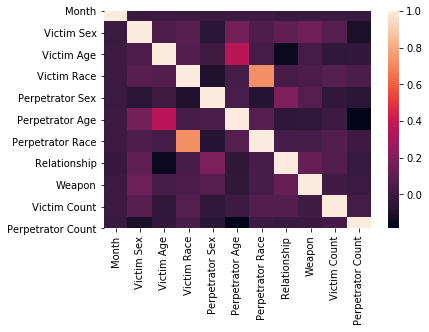

In [195]:
# Creating heatmap correlation for the entire dataset using Seaborn
corr = numerical_dataset.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
# print(corr)

In [196]:
# Creating an all male perpetrator dataset
perp_male_dataset = numerical_dataset.copy()

perp_male_limit = perp_male_dataset["Perpetrator Sex"] == 0
perp_male_dataset["Perpetrator Sex"][perp_male_limit] = np.nan
perp_male_dataset = perp_male_dataset.dropna()
perp_male_dataset = perp_male_dataset.drop(columns=["Perpetrator Sex"])
perp_male_dataset = perp_male_dataset.reset_index(drop=True)

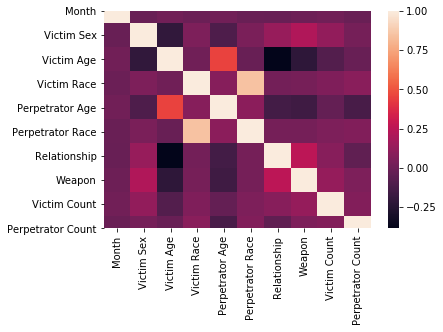

In [197]:
# Creating heatmap correlation for the male perpetrator only dataset using Seaborn
corr = perp_male_dataset.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
# print(corr)

In [198]:
# Creating an all female perpetrator dataset
perp_female_dataset = numerical_dataset.copy()

perp_female_limit = perp_female_dataset["Perpetrator Sex"] == 1
perp_female_dataset["Perpetrator Sex"][perp_female_limit] = np.nan
perp_female_dataset = perp_female_dataset.dropna()
perp_female_dataset = perp_female_dataset.drop(columns=["Perpetrator Sex"])
perp_female_dataset = perp_female_dataset.reset_index(drop=True)

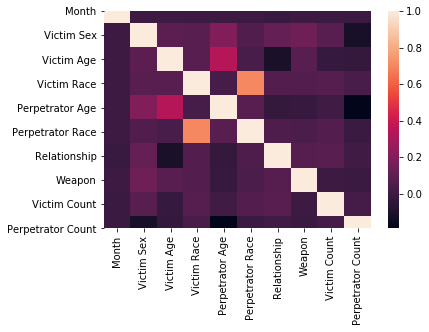

In [199]:
# Creating heatmap correlation for the female perpetrator only dataset using Seaborn
corr = perp_female_dataset.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
# print(corr)

In [200]:
# Creating an all male vicitim dataset
vic_male_dataset = numerical_dataset.copy()

vic_male_limit = vic_male_dataset["Victim Sex"] == 0
vic_male_dataset["Victim Sex"][vic_male_limit] = np.nan
vic_male_dataset = vic_male_dataset.dropna()
vic_male_dataset = vic_male_dataset.drop(columns=["Victim Sex"])
vic_male_dataset = vic_male_dataset.reset_index(drop=True)

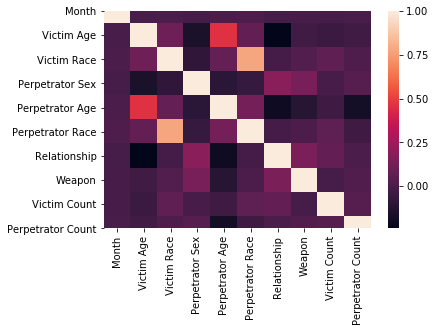

In [201]:
# Creating heatmap correlation for the male victim only dataset using Seaborn
corr = vic_male_dataset.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
# print(corr)

In [202]:
# Creating an all female vicitim dataset
vic_female_dataset = numerical_dataset.copy()

vic_female_limit = vic_female_dataset["Victim Sex"] == 1
vic_female_dataset["Victim Sex"][vic_female_limit] = np.nan
vic_female_dataset = vic_female_dataset.dropna()
vic_female_dataset = vic_female_dataset.drop(columns=["Victim Sex"])
vic_female_dataset = vic_female_dataset.reset_index(drop=True)

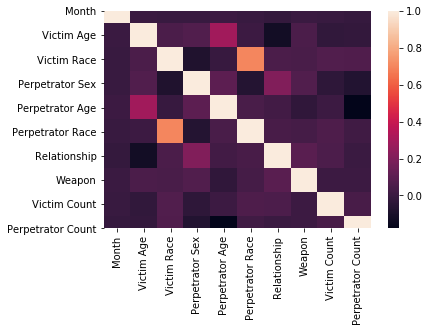

In [203]:
# Creating heatmap correlation for the female victim only dataset using Seaborn
corr = vic_female_dataset.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
# print(corr)

In [204]:
# Creating an all native american perpetrator dataset
perp_native_american_dataset = numerical_dataset.copy()

perp_native_american_limit = perp_native_american_dataset["Perpetrator Race"] != 0
perp_native_american_dataset["Perpetrator Race"][perp_native_american_limit] = np.nan
perp_native_american_dataset = perp_native_american_dataset.dropna()
perp_native_american_dataset = perp_native_american_dataset.drop(columns=["Perpetrator Race"])
perp_native_american_dataset = perp_native_american_dataset.reset_index(drop=True)

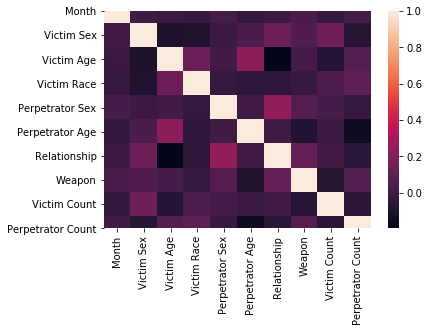

In [205]:
# Creating heatmap correlation for the native american perpetrator only dataset using Seaborn
corr = perp_native_american_dataset.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
# print(corr)

In [206]:
# Creating an all black perpetrator dataset
perp_black_dataset = numerical_dataset.copy()

perp_black_limit = perp_black_dataset["Perpetrator Race"] != 1
perp_black_dataset["Perpetrator Race"][perp_black_limit] = np.nan
perp_black_dataset = perp_black_dataset.dropna()
perp_black_dataset = perp_black_dataset.drop(columns=["Perpetrator Race"])
perp_black_dataset = perp_black_dataset.reset_index(drop=True)

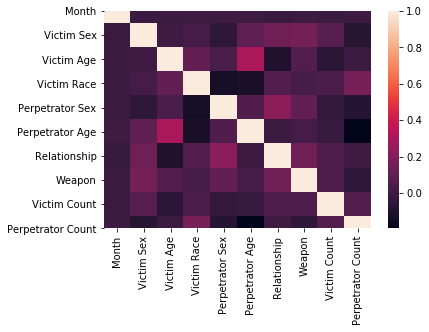

In [207]:
# Creating heatmap correlation for the black perpetrator only dataset using Seaborn
corr = perp_black_dataset.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
# print(corr)

In [208]:
# Creating an all white perpetrator dataset
perp_white_dataset = numerical_dataset.copy()

perp_white_limit = perp_white_dataset["Perpetrator Race"] != 2
perp_white_dataset["Perpetrator Race"][perp_white_limit] = np.nan
perp_white_dataset = perp_white_dataset.dropna()
perp_white_dataset = perp_white_dataset.drop(columns=["Perpetrator Race"])
perp_white_dataset = perp_white_dataset.reset_index(drop=True)

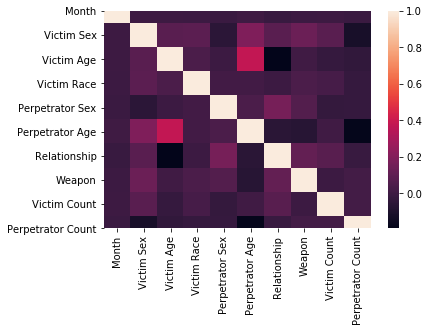

In [209]:
# Creating heatmap correlation for the black perpetrator only dataset using Seaborn
corr = perp_white_dataset.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
# print(corr)

In [210]:
# Creating an all black perpetrator dataset
perp_asian_dataset = numerical_dataset.copy()

perp_asian_limit = perp_asian_dataset["Perpetrator Race"] != 3
perp_asian_dataset["Perpetrator Race"][perp_asian_limit] = np.nan
perp_asian_dataset = perp_asian_dataset.dropna()
perp_asian_dataset = perp_asian_dataset.drop(columns=["Perpetrator Race"])
perp_asian_dataset = perp_asian_dataset.reset_index(drop=True)

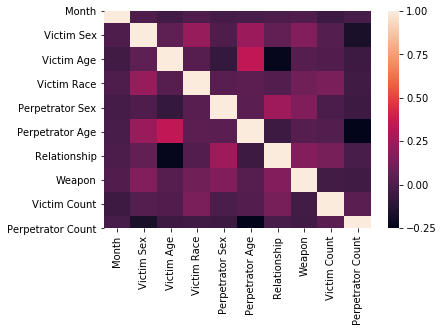

In [211]:
# Creating heatmap correlation for the black perpetrator only dataset using Seaborn
corr = perp_asian_dataset.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
# print(corr)

In [212]:
# Creating an all native american victim dataset
vic_native_american_dataset = numerical_dataset.copy()

vic_native_american_limit = vic_native_american_dataset["Victim Race"] != 0
vic_native_american_dataset["Victim Race"][vic_native_american_limit] = np.nan
vic_native_american_dataset = vic_native_american_dataset.dropna()
vic_native_american_dataset = vic_native_american_dataset.drop(columns=["Victim Race"])
vic_native_american_dataset = vic_native_american_dataset.reset_index(drop=True)

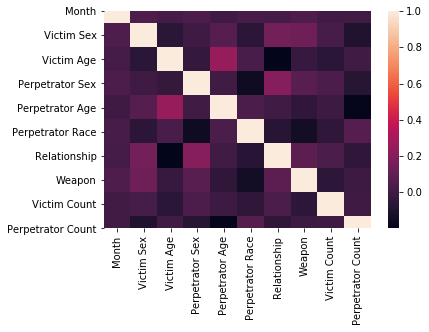

In [213]:
# Creating heatmap correlation for the native american victim only dataset using Seaborn
corr = vic_native_american_dataset.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
# print(corr)

In [214]:
# Creating an all black victim dataset
vic_black_dataset = numerical_dataset.copy()

vic_black_limit = vic_black_dataset["Victim Race"] != 1
vic_black_dataset["Victim Race"][vic_black_limit] = np.nan
vic_black_dataset = vic_black_dataset.dropna()
vic_black_dataset = vic_black_dataset.drop(columns=["Victim Race"])
vic_black_dataset = vic_black_dataset.reset_index(drop=True)

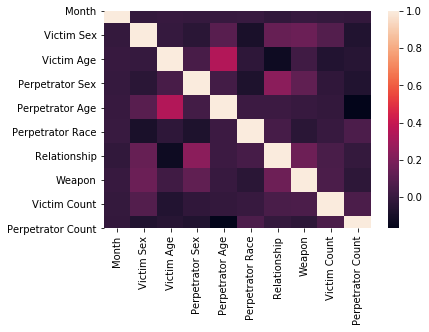

In [215]:
# Creating heatmap correlation for the black victim only dataset using Seaborn
corr = vic_black_dataset.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
# print(corr)

In [216]:
# Creating an all white victim dataset
vic_white_dataset = numerical_dataset.copy()

vic_white_limit = vic_white_dataset["Victim Race"] != 2
vic_white_dataset["Victim Race"][vic_white_limit] = np.nan
vic_white_dataset = vic_white_dataset.dropna()
vic_white_dataset = vic_white_dataset.drop(columns=["Victim Race"])
vic_white_dataset = vic_white_dataset.reset_index(drop=True)

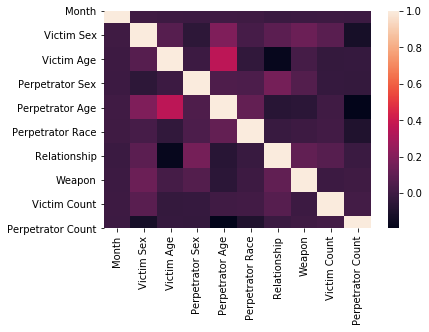

In [217]:
# Creating heatmap correlation for the white victim only dataset using Seaborn
corr = vic_white_dataset.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
# print(corr)

In [218]:
# Creating an all asian victim dataset
vic_asian_dataset = numerical_dataset.copy()

vic_asian_limit = vic_asian_dataset["Victim Race"] != 3
vic_asian_dataset["Victim Race"][vic_asian_limit] = np.nan
vic_asian_dataset = vic_asian_dataset.dropna()
vic_asian_dataset = vic_asian_dataset.drop(columns=["Victim Race"])
vic_asian_dataset = vic_asian_dataset.reset_index(drop=True)

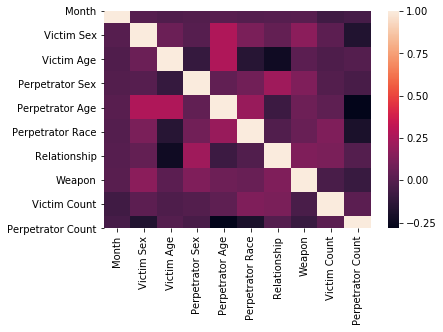

In [219]:
# Creating heatmap correlation for the asian victim only dataset using Seaborn
corr = vic_asian_dataset.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
# print(corr)

In [220]:
# regressions for perpertrator age using victim data
dep_var = 'Perpetrator Age'

perp_age = pd.DataFrame()

for combination in it.combinations(victim_vars, 1):
    y = pd.DataFrame(numerical_dataset[dep_var])
    x = pd.DataFrame(numerical_dataset[[combination[0]]])
    model = LinearRegression()
    model.fit(x, y)
    perp_age = perp_age.append({'Independent Variable' : combination[0], dep_var : model.score(x, y)}, ignore_index = True)
    
for combination in it.combinations(victim_vars, 2):
    y = pd.DataFrame(numerical_dataset[dep_var])
    x = pd.DataFrame(numerical_dataset[[combination[0], combination[1]]])
    model = LinearRegression()
    model.fit(x, y)
    perp_age = perp_age.append({'Independent Variable' : combination[0] + '/' + combination[1], dep_var : model.score(x, y)}, ignore_index = True)
    
for combination in it.combinations(victim_vars, 3):
    y = pd.DataFrame(numerical_dataset[dep_var])
    x = pd.DataFrame(numerical_dataset[[combination[0], combination[1], combination[2]]])
    model = LinearRegression()
    model.fit(x, y)
    perp_age = perp_age.append({'Independent Variable' : combination[0] + '/' + combination[1] + '/' + combination[2], dep_var : model.score(x, y)}, ignore_index = True)

perp_age.sort_values(by = ['Perpetrator Age'], ascending = False)

,Independent Variable,Perpetrator Age
11,Victim Sex/Victim Age/Relationship,0.145781
10,Victim Sex/Victim Age/Victim Race,0.145773
4,Victim Sex/Victim Age,0.145760
13,Victim Age/Victim Race/Relationship,0.125287
8,Victim Age/Relationship,0.125240
7,Victim Age/Victim Race,0.124838
1,Victim Age,0.124774
12,Victim Sex/Victim Race/Relationship,0.030238
6,Victim Sex/Relationship,0.029773
5,Victim Sex/Victim Race,0.027497


In [221]:
# regressions for perpertrator sex using victim data
dep_var = 'Perpetrator Sex'

perp_sex = pd.DataFrame()

for combination in it.combinations(victim_vars, 1):
    y = pd.DataFrame(numerical_dataset[dep_var])
    x = pd.DataFrame(numerical_dataset[[combination[0]]])
    model = LinearRegression()
    model.fit(x, y)
    perp_sex = perp_sex.append({'Independent Variable' : combination[0], dep_var : model.score(x, y)}, ignore_index = True)
    
for combination in it.combinations(victim_vars, 2):
    y = pd.DataFrame(numerical_dataset[dep_var])
    x = pd.DataFrame(numerical_dataset[[combination[0], combination[1]]])
    model = LinearRegression()
    model.fit(x, y)
    perp_sex = perp_sex.append({'Independent Variable' : combination[0] + '/' + combination[1], dep_var : model.score(x, y)}, ignore_index = True)
    
for combination in it.combinations(victim_vars, 3):
    y = pd.DataFrame(numerical_dataset[dep_var])
    x = pd.DataFrame(numerical_dataset[[combination[0], combination[1], combination[2]]])
    model = LinearRegression()
    model.fit(x, y)
    perp_sex = perp_sex.append({'Independent Variable' : combination[0] + '/' + combination[1] + '/' + combination[2], dep_var : model.score(x, y)}, ignore_index = True)

perp_sex.sort_values(by = ['Perpetrator Sex'], ascending = False)

,Independent Variable,Perpetrator Sex
12,Victim Sex/Victim Race/Relationship,0.049813
13,Victim Age/Victim Race/Relationship,0.047561
9,Victim Race/Relationship,0.045378
11,Victim Sex/Victim Age/Relationship,0.043933
6,Victim Sex/Relationship,0.041936
8,Victim Age/Relationship,0.038003
3,Relationship,0.036478
10,Victim Sex/Victim Age/Victim Race,0.009881
5,Victim Sex/Victim Race,0.009576
7,Victim Age/Victim Race,0.007698


In [222]:
# regressions for perpertrator race using victim data
dep_var = 'Perpetrator Race'

perp_race = pd.DataFrame()

for combination in it.combinations(victim_vars, 1):
    y = pd.DataFrame(numerical_dataset[dep_var])
    x = pd.DataFrame(numerical_dataset[[combination[0]]])
    model = LinearRegression()
    model.fit(x, y)
    perp_race = perp_race.append({'Independent Variable' : combination[0], dep_var : model.score(x, y)}, ignore_index = True)
    
for combination in it.combinations(victim_vars, 2):
    y = pd.DataFrame(numerical_dataset[dep_var])
    x = pd.DataFrame(numerical_dataset[[combination[0], combination[1]]])
    model = LinearRegression()
    model.fit(x, y)
    perp_race = perp_race.append({'Independent Variable' : combination[0] + '/' + combination[1], dep_var : model.score(x, y)}, ignore_index = True)
    
for combination in it.combinations(victim_vars, 3):
    y = pd.DataFrame(numerical_dataset[dep_var])
    x = pd.DataFrame(numerical_dataset[[combination[0], combination[1], combination[2]]])
    model = LinearRegression()
    model.fit(x, y)
    perp_race = perp_race.append({'Independent Variable' : combination[0] + '/' + combination[1] + '/' + combination[2], dep_var : model.score(x, y)}, ignore_index = True)

perp_race.sort_values(by = ['Perpetrator Race'], ascending = False)

,Independent Variable,Perpetrator Race
13,Victim Age/Victim Race/Relationship,0.524042
10,Victim Sex/Victim Age/Victim Race,0.524042
7,Victim Age/Victim Race,0.524041
12,Victim Sex/Victim Race/Relationship,0.523585
9,Victim Race/Relationship,0.523580
5,Victim Sex/Victim Race,0.523565
2,Victim Race,0.523562
11,Victim Sex/Victim Age/Relationship,0.005239
6,Victim Sex/Relationship,0.004204
4,Victim Sex/Victim Age,0.004173


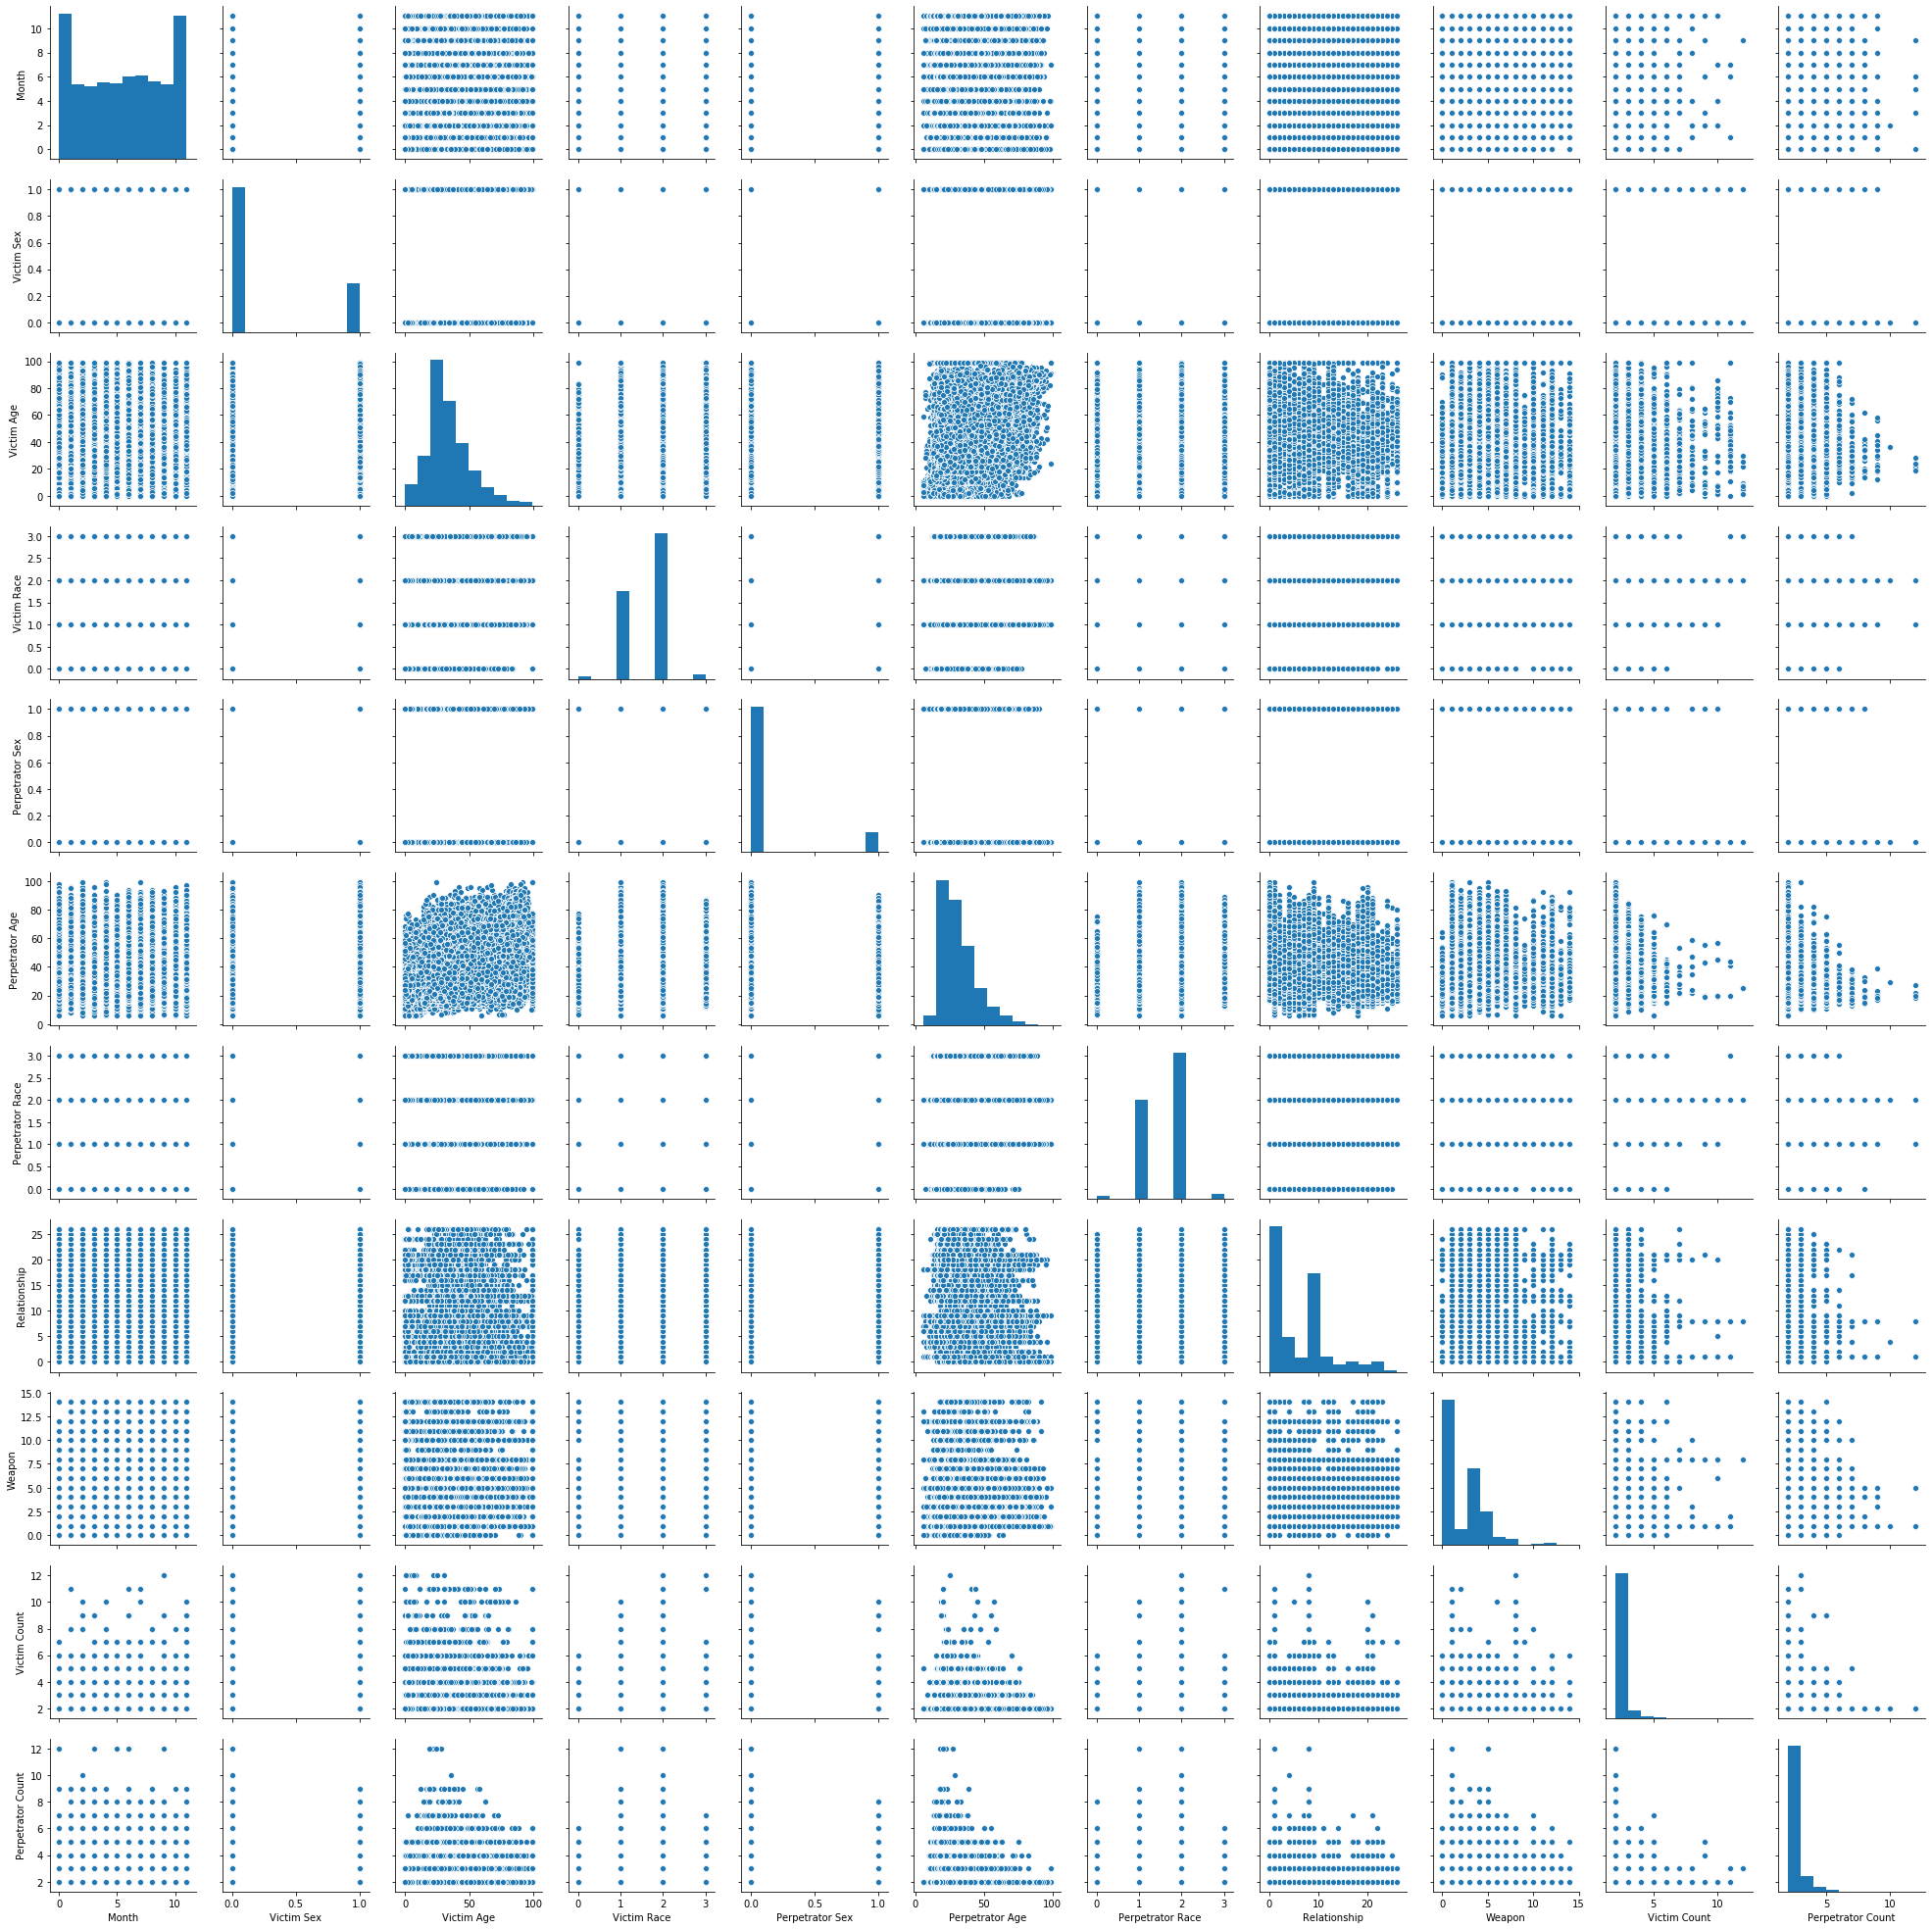

In [223]:
sns.pairplot(numerical_dataset)

In [224]:
# testing same race murders
same_race_dataset = numerical_dataset.copy()

same_race_dataset['Same Race'] = same_race_dataset['Perpetrator Race'] == same_race_dataset['Victim Race']
same_race = same_race_dataset['Same Race'].value_counts().loc[True]
different_race = same_race_dataset['Same Race'].value_counts().loc[False]
(same_race/(same_race + different_race)*100).round(2)

87.52

In [225]:
# testing same sex murders
same_sex_dataset = numerical_dataset.copy()

same_sex_dataset['Same Sex'] = same_sex_dataset['Perpetrator Sex'] == same_race_dataset['Victim Sex']
same_sex = same_sex_dataset['Same Sex'].value_counts().loc[True]
different_sex = same_sex_dataset['Same Sex'].value_counts().loc[False]
(same_sex/(same_sex + different_sex)*100).round(2)

67.29

In [226]:
# regressions for perpertrator race using victim and scene data
dep_var = 'Perpetrator Race'

perp_race = pd.DataFrame()

for combination in it.combinations(victim_vars + scene_vars, 1):
    y = pd.DataFrame(numerical_dataset[dep_var])
    x = pd.DataFrame(numerical_dataset[[combination[0]]])
    model = LinearRegression()
    model.fit(x, y)
    perp_race = perp_race.append({'Independent Variable' : combination[0], dep_var : model.score(x, y)}, ignore_index = True)
    
for combination in it.combinations(victim_vars + scene_vars, 2):
    y = pd.DataFrame(numerical_dataset[dep_var])
    x = pd.DataFrame(numerical_dataset[[combination[0], combination[1]]])
    model = LinearRegression()
    model.fit(x, y)
    perp_race = perp_race.append({'Independent Variable' : combination[0] + '/' + combination[1], dep_var : model.score(x, y)}, ignore_index = True)
    
for combination in it.combinations(victim_vars + scene_vars, 3):
    y = pd.DataFrame(numerical_dataset[dep_var])
    x = pd.DataFrame(numerical_dataset[[combination[0], combination[1], combination[2]]])
    model = LinearRegression()
    model.fit(x, y)
    perp_race = perp_race.append({'Independent Variable' : combination[0] + '/' + combination[1] + '/' + combination[2], dep_var : model.score(x, y)}, ignore_index = True)

perp_race.sort_values(by = ['Perpetrator Race'], ascending = False)

,Independent Variable,Perpetrator Race
61,Victim Age/Victim Race/Perpetrator Count,0.524938
81,Victim Race/Victim Count/Perpetrator Count,0.524574
80,Victim Race/Weapon/Perpetrator Count,0.524445
46,Victim Sex/Victim Race/Perpetrator Count,0.524444
75,Victim Race/Relationship/Perpetrator Count,0.524437
...,...,...
17,Victim Age/Month,0.000939
1,Victim Age,0.000929
32,Month/Perpetrator Count,0.000041
7,Perpetrator Count,0.000030


In [227]:
numerical_dataset.describe()

,Month,Victim Sex,Victim Age,Victim Race,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Relationship,Weapon,Victim Count,Perpetrator Count
count,151172.000000,151172.000000,151172.000000,151172.000000,151172.000000,151172.000000,151172.000000,151172.000000,151172.000000,151172.000000,151172.000000
mean,5.512727,0.252758,33.643565,1.635898,0.120174,31.468797,1.604748,5.838674,2.652330,2.106548,2.187607
std,3.404973,0.434595,17.013674,0.538403,0.325166,12.963522,0.540519,5.580388,2.064548,0.481946,0.554486
min,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,2.000000,2.000000
25%,3.000000,0.000000,22.000000,1.000000,0.000000,22.000000,1.000000,1.000000,1.000000,2.000000,2.000000
50%,6.000000,0.000000,30.000000,2.000000,0.000000,28.000000,2.000000,4.000000,1.000000,2.000000,2.000000
75%,8.000000,1.000000,42.000000,2.000000,0.000000,38.000000,2.000000,8.000000,4.000000,2.000000,2.000000
max,11.000000,1.000000,99.000000,3.000000,1.000000,99.000000,3.000000,26.000000,14.000000,12.000000,12.000000


In [228]:
# regression for perp age with statsmodel
y = numerical_dataset['Perpetrator Age']
x1 = numerical_dataset[['Victim Age', 'Victim Sex', 'Victim Race']]
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

/opt/tljh/user/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Perpetrator Age   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.146
Method:                 Least Squares   F-statistic:                     8599.
Date:                Thu, 05 Dec 2019   Prob (F-statistic):               0.00
Time:                        00:52:54   Log-Likelihood:            -5.8992e+05
No. Observations:              151172   AIC:                         1.180e+06
Df Residuals:                  151168   BIC:                         1.180e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          21.6622      0.113    192.061      0.000      21.441      21.883
Victim Age      0.2631      0.002    144.674      0.000       0.260       0.267
Victim Sex      4.3366      0.071     60.866      0.000       4.197       4.476
Victim Race    -0.0857      0.058     -1.488      0.137      -0.199       0.027
==============================================================================
Omnibus:                    19554.492   Durbin-Watson:                   1.915
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            31170.698
Skew:                           0.910   Prob(JB):                         0.00
Kurtosis:                       4.279   Cond. No.                         150.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [242]:
# create function to estimate perp age with victim data
def perp_age(victim_age, victim_sex, victim_race):
    # regression for perp age with statsmodel
    y = numerical_dataset['Perpetrator Age']
    x1 = numerical_dataset[['Victim Age', 'Victim Sex', 'Victim Race']]
    x = sm.add_constant(x1)
    results = sm.OLS(y,x).fit()
    perp_age = results.params['const'] + (results.params['Victim Age']*victim_age) + (results.params['Victim Sex']*victim_sex) + (results.params['Victim Race']*victim_race)
    return perp_age;

28.15328965017729

In [241]:
# regression for perp sex with statsmodel
y = numerical_dataset['Perpetrator Sex']
x1 = numerical_dataset[['Victim Age', 'Victim Sex', 'Victim Race']]
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

const          0.200550
Victim Age     0.000335
Victim Sex    -0.035123
Victim Race   -0.050600
dtype: float64

In [243]:
# create function to estimate perp sex with victim data
def perp_sex(victim_age, victim_sex, victim_race):
    # regression for perp sex with statsmodel
    y = numerical_dataset['Perpetrator Sex']
    x1 = numerical_dataset[['Victim Age', 'Victim Sex', 'Victim Race']]
    x = sm.add_constant(x1)
    results = sm.OLS(y,x).fit()
    perp_sex = results.params['const'] + (results.params['Victim Age']*victim_age) + (results.params['Victim Sex']*victim_sex) + (results.params['Victim Race']*victim_race)
    return perp_sex;

0.15833084810085352

In [232]:
# regression for perp race with statsmodel
y = numerical_dataset['Perpetrator Race']
x1 = numerical_dataset[['Victim Age', 'Victim Sex', 'Victim Race']]
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Perpetrator Race   R-squared:                       0.524
Model:                            OLS   Adj. R-squared:                  0.524
Method:                 Least Squares   F-statistic:                 5.548e+04
Date:                Thu, 05 Dec 2019   Prob (F-statistic):               0.00
Time:                        00:52:54   Log-Likelihood:                -65382.
No. Observations:              151172   AIC:                         1.308e+05
Df Residuals:                  151168   BIC:                         1.308e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.4373      0.004    124.583      0.000       0.430       0.444
Victim Age     -0.0007   5.66e-05    -12.299      0.000      -0.001      -0.001
Victim Sex     -0.0008      0.002     -0.358      0.720      -0.005       0.004
Victim Race     0.7281      0.002    406.343      0.000       0.725       0.732
==============================================================================
Omnibus:                    25843.603   Durbin-Watson:                   1.884
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           253949.426
Skew:                          -0.533   Prob(JB):                         0.00
Kurtosis:                       9.259   Cond. No.                         150.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [244]:
# create function to estimate perp race with victim data
def perp_race(victim_age, victim_sex, victim_race):
    # regression for perp race with statsmodel
    y = numerical_dataset['Perpetrator Race']
    x1 = numerical_dataset[['Victim Age', 'Victim Sex', 'Victim Race']]
    x = sm.add_constant(x1)
    results = sm.OLS(y,x).fit()
    perp_race = results.params['const'] + (results.params['Victim Age']*victim_age) + (results.params['Victim Sex']*victim_sex) + (results.params['Victim Race']*victim_race)
    return perp_race;

1.1479908871775657

In [294]:
# test victim

# victim_sex_dict={'Male':0,'Female':1}
# victim_race_dict={'Native American/Alaska Native':0,'Black':1,'White':2,'Asian/Pacific Islander':3}

test_age = 25
test_sex = 1
test_race = 3

# perpetrator_sex_dict={'Male':0,'Female':1}
# perpetrator_race_dict={'Native American/Alaska Native':0,'Black':1,'White':2,'Asian/Pacific Islander':3}

print('The perps age is:', int(round(perp_age(test_age, test_sex, test_race))))
print('The perps sex is:', list(perpetrator_sex_dict.keys())[list(perpetrator_sex_dict.values()).index(round(perp_sex(test_age, test_sex, test_race)))])
print('The perps race is:', list(perpetrator_race_dict.keys())[list(perpetrator_race_dict.values()).index(round(perp_race(test_age, test_sex, test_race)))])

The perps age is: 32
The perps sex is: Male
The perps race is: Asian/Pacific Islander
